# Project 3 - Text Classification: Categorizing Music Genres

## Problem Statement

Bassline, a small, up-and-coming company that handles social media management for musicians, receives an huge influx of fan posts and reviews for each client, largely focused in the genres of Metal and Hip Hop.  
Bassline is looking for a better way to categorize incoming reviews and fan posts by genre, in order to discover new and relevant trends and insights as they occur. They’re hoping to use what they discover to reshape their marketing strategy to better reflect their target audience.



## Data Collection - Subreddit Post Retrieval 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import requests
import json
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, precision_score
from sklearn.metrics import  RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay 
from nltk import word_tokenize

### Hiphopheads Post Pulls
https://www.reddit.com/r/hiphopheads/

Total Posts Collected: 20700

In [5]:
hh_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=hiphopheads'

In [16]:
# res = requests.get(hh_url, params = {
#                       'size' : 100,
#                       #'before' : utc,
#                       #'is_self' : True
#                   })
    
# check = res.status_code 


# if check == 200:
#     data = res.json()
#     pulls = data['data']
#     total = len(pulls)
#     first_pull = pd.DataFrame(pulls)
#     print('ok')
#     print(total)

# first_pull.head()

ok
100


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,whitelist_status,wls,removed_by_category,author_flair_template_id,author_flair_text_color,crosspost_parent,crosspost_parent_list,author_flair_background_color,link_flair_css_class,link_flair_text
0,[],False,CautiousKieran,None,[],None,text,t2_y8kbc,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,sheff_99,None,[],None,text,t2_bvcnte8t,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Glittering-Mirror951,None,[],None,text,t2_ar4pcw3i,False,False,...,all_ads,6,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Alive-Ad-4164,None,[],None,text,t2_ejxnnopl,False,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,HHHRobot,illuminati,"[{'e': 'text', 't': '.'}]",.,richtext,t2_34blvi2t,False,False,...,all_ads,6,NaN,88884bc2-90f3-11e2-9db2-12313b0ea9e6,dark,NaN,NaN,NaN,NaN,NaN


In [45]:
# res = requests.get(hh_url, params = {
#                       'size' : 100,
#                       'before' : 1651006637,
                      
#                   })
    
# check = res.status_code 


# if check == 200:
#     data = res.json()
#     pulls = data['data']
#     total = len(pulls)
#     pull = pd.DataFrame(pulls)
#     first_pull = pd.concat([first_pull, pull])
#     print('ok')
#     print(total)
#     print(len(first_pull))
# first_pull.head()

ok
100
1000


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,removed_by_category,author_flair_template_id,author_flair_text_color,crosspost_parent,crosspost_parent_list,author_flair_background_color,link_flair_css_class,link_flair_text,banned_by,author_cakeday
0,[],False,CautiousKieran,None,[],None,text,t2_y8kbc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,sheff_99,None,[],None,text,t2_bvcnte8t,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Glittering-Mirror951,None,[],None,text,t2_ar4pcw3i,False,False,...,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Alive-Ad-4164,None,[],None,text,t2_ejxnnopl,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,HHHRobot,illuminati,"[{'e': 'text', 't': '.'}]",.,richtext,t2_34blvi2t,False,False,...,NaN,88884bc2-90f3-11e2-9db2-12313b0ea9e6,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
first_pull['created_utc'].iloc[-1]

1650813679

In [67]:
# utc = first_pull['created_utc'].iloc[-1]
# while len(first_pull) < 20700:
    
#     res = requests.get(hh_url, params = {
#                           'size' : 100,
#                           'before' : utc,
                      
#                       })
    
#     check = res.status_code 


#     if check == 200:
#         data = res.json()
#         pulls = data['data']
#         total = len(pulls)
#         pull = pd.DataFrame(pulls)
#         first_pull = pd.concat([first_pull, pull])
#         print('ok')
#         print(total)
#         print(len(first_pull))
#         time.sleep(10)
        
# return first_pull


ok
100
5800
ok
100
5900
ok
100
6000
ok
100
6100
ok
100
6200
ok
100
6300
ok
100
6400
ok
100
6500
ok
100
6600
ok
100
6700
ok
100
6800
ok
100
6900
ok
100
7000
ok
100
7100
ok
100
7200
ok
100
7300
ok
100
7400
ok
100
7500
ok
100
7600
ok
100
7700
ok
100
7800
ok
100
7900
ok
100
8000
ok
100
8100
ok
100
8200
ok
100
8300
ok
100
8400
ok
100
8500
ok
100
8600
ok
100
8700
ok
100
8800
ok
100
8900
ok
100
9000
ok
100
9100
ok
100
9200
ok
100
9300
ok
100
9400
ok
100
9500
ok
100
9600
ok
100
9700
ok
100
9800
ok
100
9900
ok
100
10000
ok
100
10100
ok
100
10200
ok
100
10300
ok
100
10400
ok
100
10500
ok
100
10600
ok
100
10700
ok
100
10800
ok
100
10900
ok
100
11000
ok
100
11100
ok
100
11200
ok
100
11300
ok
100
11400
ok
100
11500
ok
100
11600
ok
100
11700
ok
100
11800
ok
100
11900
ok
100
12000
ok
100
12100
ok
100
12200
ok
100
12300
ok
100
12400
ok
100
12500
ok
100
12600
ok
100
12700
ok
100
12800
ok
100
12900
ok
100
13000
ok
100
13100
ok
100
13200
ok
100
13300
ok
100
13400
ok
100
13500
ok
100
13600
ok
100
13700
ok

SyntaxError: 'return' outside function (3712085291.py, line 24)

In [71]:
len(first_pull)

20700

In [4]:
# first_pull.to_csv('./datasets/hiphophead_20700.csv')

In [163]:
hiphopheads

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,author_flair_text_color,crosspost_parent,crosspost_parent_list,author_flair_background_color,link_flair_css_class,link_flair_text,banned_by,author_cakeday,edited,link_flair_template_id
0,0,[],False,CautiousKieran,NaN,[],NaN,text,t2_y8kbc,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,sheff_99,NaN,[],NaN,text,t2_bvcnte8t,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Glittering-Mirror951,NaN,[],NaN,text,t2_ar4pcw3i,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Alive-Ad-4164,NaN,[],NaN,text,t2_ejxnnopl,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,HHHRobot,illuminati,"[{'e': 'text', 't': '.'}]",.,richtext,t2_34blvi2t,False,...,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20695,95,[],False,Bars_Tender,NaN,[],NaN,text,t2_mbz4sy05,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20696,96,[],False,grouchygreg,NaN,[],NaN,text,t2_a4vls,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20697,97,[],False,CrimsonClockwork420,NaN,[],NaN,text,t2_cfoebagd,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20698,98,[],False,CrimsonClockwork420,NaN,[],NaN,text,t2_cfoebagd,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Metal Post Pulls
https://www.reddit.com/r/Metal/

Total Posts Collected: 20700

In [50]:
m_url = 'https://api.pushshift.io/reddit/search/submission?subreddit=Metal'

In [51]:
# res = requests.get(m_url, params = {
#                       'size' : 100,
#                       #'before' : utc,
#                       #'is_self' : True
#                   })
    
# check = res.status_code 


# if check == 200:
#     data = res.json()
#     pulls = data['data']
#     total = len(pulls)
#     sec_pull = pd.DataFrame(pulls)
#     print('ok')
#     print(total)

# sec_pull.head()

ok
100


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,author_flair_background_color,author_flair_template_id,author_flair_text_color,banned_by
0,[],False,ThroughTheDawn,None,[],None,text,t2_aqpbe,False,False,...,1.0,https://www.youtube.com/watch?v=_QyPDHCpYF8,https://www.youtube.com/watch?v=_QyPDHCpYF8,all_ads,6,NaN,NaN,NaN,NaN,NaN
1,[],False,Traditional-Tutor232,None,[],None,text,t2_9ci9mq4i,False,False,...,1.0,https://www.reddit.com/r/Metal/comments/ufdft5...,NaN,all_ads,6,moderator,NaN,NaN,NaN,NaN
2,[],False,Traditional-Tutor232,None,[],None,text,t2_9ci9mq4i,False,False,...,1.0,https://www.reddit.com/r/Metal/comments/ufdf5j...,NaN,all_ads,6,moderator,NaN,NaN,NaN,NaN
3,[],False,imafreakininja,None,[],"Writer: German Power Metal, Blackgaze",text,t2_11s6aa,False,False,...,1.0,https://folkvangrrecords.bandcamp.com/track/ma...,https://folkvangrrecords.bandcamp.com/track/ma...,all_ads,6,NaN,#646d73,f7f06472-553f-11eb-acca-0ea90e7aef2d,light,NaN
4,[],False,Epic_Troll_666,None,[],None,text,t2_z726b,False,False,...,1.0,https://youtu.be/MQhH30LLxac,https://youtu.be/MQhH30LLxac,all_ads,6,NaN,NaN,NaN,NaN,NaN


In [84]:
sec_pull['created_utc'].iloc[-1]

1650862818

In [85]:
# utc = sec_pull['created_utc'].iloc[-1]
# while len(sec_pull) < 20700:
    
#     res = requests.get(m_url, params = {
#                           'size' : 100,
#                           'before' : utc,
                      
#                       })
    
#     check = res.status_code 


#     if check == 200:
#         data = res.json()
#         pulls = data['data']
#         total = len(pulls)
#         pull = pd.DataFrame(pulls)
#         sec_pull = pd.concat([sec_pull, pull])
#         print('ok')
#         print(total)
#         print(len(sec_pull))
#         time.sleep(10)
        
# return sec_pull

ok
100
20100
ok
100
20200
ok
100
20300
ok
100
20400
ok
100
20500
ok
100
20600
ok
100
20700


SyntaxError: 'return' outside function (634833167.py, line 24)

In [86]:
len(sec_pull)

20700

In [16]:
#sec_pull.to_csv('./datasets/metal_20700.csv')

### Post Datasets

In [18]:
metal = pd.read_csv('./datasets/metal_20700.csv')
hiphopheads = pd.read_csv('./datasets/hiphophead_20700.csv')

/var/folders/cs/17qm7l8j32n86y7d3c9674w80000gn/T/ipykernel_12919/20548885.py:1: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  metal = pd.read_csv('./datasets/metal_20700.csv')
/var/folders/cs/17qm7l8j32n86y7d3c9674w80000gn/T/ipykernel_12919/20548885.py:2: DtypeWarning: Columns (10,11,75,76,77,78,79,81) have mixed types. Specify dtype option on import or set low_memory=False.
  hiphopheads = pd.read_csv('./datasets/hiphophead_20700.csv')


In [19]:
metal.shape, hiphopheads.shape

((20700, 78), (20700, 82))

In [20]:
metal.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,author_flair_background_color,author_flair_template_id,author_flair_text_color,banned_by,author_cakeday
0,0,[],False,ThroughTheDawn,NaN,[],NaN,text,t2_aqpbe,False,...,https://www.youtube.com/watch?v=_QyPDHCpYF8,https://www.youtube.com/watch?v=_QyPDHCpYF8,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Traditional-Tutor232,NaN,[],NaN,text,t2_9ci9mq4i,False,...,https://www.reddit.com/r/Metal/comments/ufdft5...,NaN,all_ads,6,moderator,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Traditional-Tutor232,NaN,[],NaN,text,t2_9ci9mq4i,False,...,https://www.reddit.com/r/Metal/comments/ufdf5j...,NaN,all_ads,6,moderator,NaN,NaN,NaN,NaN,NaN
3,3,[],False,imafreakininja,NaN,[],"Writer: German Power Metal, Blackgaze",text,t2_11s6aa,False,...,https://folkvangrrecords.bandcamp.com/track/ma...,https://folkvangrrecords.bandcamp.com/track/ma...,all_ads,6,NaN,#646d73,f7f06472-553f-11eb-acca-0ea90e7aef2d,light,NaN,NaN
4,4,[],False,Epic_Troll_666,NaN,[],NaN,text,t2_z726b,False,...,https://youtu.be/MQhH30LLxac,https://youtu.be/MQhH30LLxac,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
hiphopheads.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,author_flair_text_color,crosspost_parent,crosspost_parent_list,author_flair_background_color,link_flair_css_class,link_flair_text,banned_by,author_cakeday,edited,link_flair_template_id
0,0,[],False,CautiousKieran,NaN,[],NaN,text,t2_y8kbc,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,sheff_99,NaN,[],NaN,text,t2_bvcnte8t,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Glittering-Mirror951,NaN,[],NaN,text,t2_ar4pcw3i,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Alive-Ad-4164,NaN,[],NaN,text,t2_ejxnnopl,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,HHHRobot,illuminati,"[{'e': 'text', 't': '.'}]",.,richtext,t2_34blvi2t,False,...,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and EDA

In [22]:
hiphop_metal = pd.concat([hiphopheads, metal])
hiphop_metal = hiphop_metal.drop(columns='Unnamed: 0')
hiphop_metal.to_csv('./datasets/hiphop_metal.csv')

In [24]:
hiphop_metal.shape

(41400, 81)

In [25]:
hiphop_metal.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_text_color,crosspost_parent,crosspost_parent_list,author_flair_background_color,link_flair_css_class,link_flair_text,banned_by,author_cakeday,edited,link_flair_template_id
0,[],False,CautiousKieran,NaN,[],NaN,text,t2_y8kbc,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,sheff_99,NaN,[],NaN,text,t2_bvcnte8t,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Glittering-Mirror951,NaN,[],NaN,text,t2_ar4pcw3i,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Alive-Ad-4164,NaN,[],NaN,text,t2_ejxnnopl,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,HHHRobot,illuminati,"[{'e': 'text', 't': '.'}]",.,richtext,t2_34blvi2t,False,False,...,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
hiphop_metal.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media', 'media_embed', 'media_only', 'no_follow',
       'num_comments', 'num_crossposts', 'over_18', 'parent_whitelist_status',
       'permalink', 'pinned', 'post_hint', 'preview', 'pwls', 'retrieved_on',
       'score', 'secure_media', 'secure_media_embed', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id

In [26]:
hiphop_metal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41400 entries, 0 to 20699
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  41400 non-null  object 
 1   allow_live_comments            41400 non-null  bool   
 2   author                         41400 non-null  object 
 3   author_flair_css_class         2971 non-null   object 
 4   author_flair_richtext          40617 non-null  object 
 5   author_flair_text              2780 non-null   object 
 6   author_flair_type              40617 non-null  object 
 7   author_fullname                40617 non-null  object 
 8   author_is_blocked              41400 non-null  bool   
 9   author_patreon_flair           40617 non-null  object 
 10  author_premium                 40617 non-null  object 
 11  awarders                       41400 non-null  object 
 12  can_mod_post                   41400 non-null 

In [27]:
hiphop_metal.isnull().sum()[lambda x:x >0]

author_flair_css_class           38429
author_flair_richtext              783
author_flair_text                38620
author_flair_type                  783
author_fullname                    783
author_patreon_flair               783
author_premium                     783
link_flair_background_color      38963
media                            19046
media_embed                      19053
post_hint                        11419
preview                          11419
secure_media                     19046
secure_media_embed               19053
selftext                         31432
suggested_sort                   20700
thumbnail_height                 13923
thumbnail_width                  13923
url_overridden_by_dest            9820
removed_by_category              19897
author_flair_template_id         39008
author_flair_text_color          37495
crosspost_parent                 41241
crosspost_parent_list            41241
author_flair_background_color    41240
link_flair_css_class     

In [28]:
simple_hiphop_metal = hiphop_metal[['subreddit', 'title']]
simple_hiphop_metal

,subreddit,title
0,hiphopheads,[Fresh Album] Dopermen - Saviours Of The Universe
1,hiphopheads,L'A Capone &amp; RondoNumba9 - Play For Keeps
2,hiphopheads,FULL VIDEO! DABABY CHARGED WITH FELONY ASSAULT...
3,hiphopheads,B.o.B - Nothin' On You (feat. Bruno Mars)
4,hiphopheads,"Recommended If You Like thread - April 30, 2022"
...,...,...
20695,Metal,"Is there a WhatsApp, Slack, Discord, or Telegr..."
20696,Metal,Static Abyss - Mandatory Cannibalism ( 2022 )
20697,Metal,Beastmaker - Skin Crawler [Metal] (2016)
20698,Metal,Rotting Christ - Holy Mountain (feat. Lars Ned...


In [29]:
simple_hiphop_metal.isnull().sum()

subreddit    0
title        0
dtype: int64

In [31]:
hiphop_metal['num_comments'].value_counts()

0     32449
1      8897
27       40
7         7
4         7
Name: num_comments, dtype: int64

There aren't many comments among the posts, so it might not be worth including as a feature.

hiphopheads    20700
Metal          20700
Name: subreddit, dtype: int64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


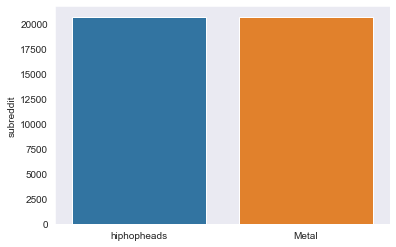

In [161]:
class_split=hiphop_metal['subreddit'].value_counts()
print(x)
sns.barplot(x.index,x);

In [56]:
hiphop_metal['url'].value_counts().head(25)

https://youtube.com/watch?v=xLmlte2DqUQ&amp;feature=share                                      450
https://m.youtube.com/watch?v=WwZu6lwqVyI                                                      321
https://www.youtube.com/watch?v=GIPP2qUI3bU                                                    300
https://youtu.be/0GaHq5vw43s                                                                   300
https://www.youtube.com/watch?v=9M-E7YFRs-0&amp;t=0                                            300
https://youtube.com/watch?v=QmSngIAk2wY&amp;feature=share                                      300
https://youtu.be/FdFjmm-A5eo                                                                   300
https://www.youtube.com/watch?v=WwZu6lwqVyI                                                    171
https://www.rollingstone.com/music/music-features/dababy-walmart-shooting-death-1341829/       158
https://www.youtube.com/watch?v=XD69xs4zG8M&amp;feature=youtu.be                               157
https://ww

Creating Youtube promotional content and sharing links could be an effective marketing strategy since most of the top 25 links are from Youtube.

In [30]:
hiphop_metal['is_video'].value_counts()

False    40868
True       532
Name: is_video, dtype: int64

There is not much video content within either subreddit, so video marketing should focus more on using links to drive traffic to video content, preferably hosted on Youtube, rather than posting videos directly if advertising on subreddit or similar environment.

In [57]:
hiphop_metal['title'].sample(n=10)

2548              Future - I.C.W.N.T (I Cant Wife No Thot)
18954    TralleyTheChimney- Feelin Myself [Official Video]
5574     Curren$y &amp; The Alchemist(feat. Freddie Gib...
1166     Ameer Vann and Merlyn Wood have a collab album...
9117                       Messa - Suspended (2022, Italy)
13788    : Love just Isn’t Enough : Just hear to get so...
874      Did Keith Ape lie about having a terminal illn...
16386                                   Latest good stuff?
19366           Plague of the Fallen - Spiritual Emptiness
16464    Destruction - Unconscious Ruins (1987) Technic...
Name: title, dtype: object

AttributeError: 'list' object has no attribute 'lower'

##### Tokenizer

In [45]:
hip_selftext = hiphopheads['selftext'].dropna()
metal_selftext = metal['selftext'].dropna()

In [46]:
metal_selftext = [line for line in metal_selftext if line != '[removed]']
metal_selftext = [nltk.word_tokenize(item) for item in metal_selftext]

In [41]:
hiphopheads_selftext = [line for line in hip_selftext if line != '[removed]']
hiphopheads_selftext = [nltk.word_tokenize(item) for item in hiphopheads_selftext]

In [50]:
hip_title = hiphopheads['title'].dropna()
hiphopheads_title_tokens = [nltk.word_tokenize(item) for item in hip_title]

In [52]:
metal_title = metal['title'].dropna()
metal_title_tokens = [nltk.word_tokenize(item) for item in metal_title]

In [165]:
len(hiphopheads_title_tokens), len(metal_title_tokens)

(20700, 20700)

In [143]:
len(hiphopheads_selftext),len(metal_selftext)

(2198, 985)

In [197]:
# Words shared between the subreddits
common_title_tokens = [i for i in hiphopheads_title_tokens if i not in metal_title_tokens]
common_title_tokens

[['[',
  'Fresh',
  'Album',
  ']',
  'Dopermen',
  '-',
  'Saviours',
  'Of',
  'The',
  'Universe'],
 ['L',
  "'",
  'A',
  'Capone',
  '&',
  'amp',
  ';',
  'RondoNumba9',
  '-',
  'Play',
  'For',
  'Keeps'],
 ['FULL',
  'VIDEO',
  '!',
  'DABABY',
  'CHARGED',
  'WITH',
  'FELONY',
  'ASSAULT',
  'AT',
  'VIDEO',
  'SHOOT',
  '!',
  '🤯',
  '#',
  'ShowfaceNews'],
 ['B.o.B',
  '-',
  'Nothin',
  "'",
  'On',
  'You',
  '(',
  'feat',
  '.',
  'Bruno',
  'Mars',
  ')'],
 ['Recommended',
  'If',
  'You',
  'Like',
  'thread',
  '-',
  'April',
  '30',
  ',',
  '2022'],
 ['Distorted', 'Bass'],
 ['[',
  'FRESH',
  'VIDEO',
  ']',
  'Croc',
  'Pot',
  '-',
  'Priustoric',
  '{',
  'vancouver',
  'lofi',
  '}'],
 ['[', 'FRESH', ']', 'Cricet', '-', 'Streets', 'is', 'Undefeated'],
 ['[',
  'FRESH',
  'VIDEO',
  ']',
  'OvrKast',
  '–',
  'Gol',
  '’',
  'Chane',
  '(',
  'Music',
  'Video',
  ')'],
 ['Reaction',
  'Video',
  'to',
  'Save',
  'The',
  'Day-No',
  'Cap',
  'Ft',
  'Kodak',

In [166]:
max(metal_title_tokens), max(hiphopheads_title_tokens)

(['💀',
  'Iron',
  'Maiden',
  '-',
  'Fear',
  'of',
  'the',
  'Dark',
  '-',
  'Epic',
  'Symphonic',
  'Version'],
 ['🚨',
  'MEGAN',
  'THEE',
  'STALLION',
  'EMOTIONALLY',
  'RECALLS',
  'TORY',
  'LANEZ',
  'INCIDENT',
  'IN',
  'NEW',
  'INTERVIEW',
  'WITH',
  'GAYLE',
  'KING',
  '🚨'])

##### Top Words

In [228]:
tester = hiphop_metal

In [220]:
cvt = CountVectorizer(stop_words='english', lowercase = False)
shm = cvt.fit_transform(simple_hiphop_metal['title'])
title_cvt = pd.DataFrame(shm.A, columns= cvt.get_feature_names_out())

In [247]:
top10 = title_cvt.sum().sort_values(ascending=False).head(10)

In [248]:
top10

The      4436
2022     2388
Metal    1929
amp      1891
FRESH    1589
In       1522
Video    1424
And      1347
song     1343
To       1289
dtype: int64

In [249]:
words = ['The','2022','Metal','amp','FRESH','In','Video','And','song','To']        
nums = ['4436','2388','1929','1891','1589','1522','1424','1347','1343','1289'] 

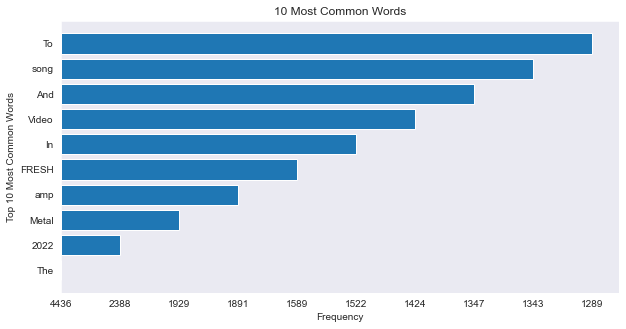

In [254]:
plt.figure(figsize=(10,5))
plt.barh(y=words, width=nums)
plt.title('10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Top 10 Most Common Words');

## Preprocessing and Modeling

### Preprocessing

In [74]:
X = simple_hiphop_metal['title']
y = simple_hiphop_metal['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, stratify=y)

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

train_text = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())
train_text

,000,04,06pm,10,100,1000,10th,11,118,11th,...,zy,às,âme,ärid,ōōõōōõō,اضطرابات,الاكتئاب,التفكير,تفسير,방탄소년단
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y.value_counts(normalize=True)

hiphopheads    0.5
Metal          0.5
Name: subreddit, dtype: float64

In [62]:
self_text_df = hiphop_metal[['subreddit', 'selftext']].dropna()
self_text_df = self_text_df[self_text_df['selftext'] != '[removed]']
self_text_df = self_text_df[self_text_df['selftext'] != '[deleted]']
self_text_df

,subreddit,selftext
4,hiphopheads,If you're looking for a recommendation give a ...
5,hiphopheads,I just wanted to clear something up.\n\nDo cer...
16,hiphopheads,I didnt really fw it at first because he seem ...
23,hiphopheads,I get that his music isn't for everyone and he...
27,hiphopheads,In the prison scene when the prisoner sings a ...
...,...,...
20586,Metal,Greetings from your AVTOMÖD. This is your new ...
20587,Metal,Greetings from your New Reddit Overlord. This ...
20645,Metal,Greetings from your New Reddit Overlord. This ...
20686,Metal,Greetings from your AVTOMÖD. This is your new ...


In [63]:
title_self = hiphop_metal[['subreddit','title', 'selftext']].dropna()
title_self = title_self[title_self['selftext'] != '[removed]']
title_self = title_self[title_self['selftext'] != '[deleted]']
title_self

,subreddit,title,selftext
4,hiphopheads,"Recommended If You Like thread - April 30, 2022",If you're looking for a recommendation give a ...
5,hiphopheads,Distorted Bass,I just wanted to clear something up.\n\nDo cer...
16,hiphopheads,[FIRST IMPRESSIONS] NoCap - Mr Crawford,I didnt really fw it at first because he seem ...
23,hiphopheads,Why does hospin get so much hate?,I get that his music isn't for everyone and he...
27,hiphopheads,Wu tang episode 2,In the prison scene when the prisoner sings a ...
...,...,...,...
20586,Metal,"[PROMOTE] Tell Us About Your Band -- April 23,...",Greetings from your AVTOMÖD. This is your new ...
20587,Metal,"Shreddit's Daily Discussion -- April 23, 2022",Greetings from your New Reddit Overlord. This ...
20645,Metal,"Shreddit's Daily Discussion -- April 24, 2022",Greetings from your New Reddit Overlord. This ...
20686,Metal,"[PROMOTE] Tell Us About Your Band -- April 23,...",Greetings from your AVTOMÖD. This is your new ...


In [64]:
self_text_df.shape, title_self.shape

((2717, 2), (2717, 3))

In [65]:
# Title only
X = hiphop_metal['title']
y = hiphop_metal['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, stratify=y)
X_train

13780                       Slim Guerilla - Passion Anthem
5687                                Aara - Strepitus Mundi
12781                     💀 Iron Maiden - Fear of the Dark
9645     Lil Uzi Vert - The Way Life Goes Remix (Feat. ...
17986                                   Latest good stuff?
                               ...                        
18707          $wift JiGGy &amp; PJ Sohal - City $ituation
4394                  SEE ALL YOUR FAVORITE ARTIST LIVE 🥵🚨
5590                                        Drake - Energy
9987                             [Admire Her] (with Gunna)
18602    EXCLUSIVE: Rihanna wows in skimpy sequined bik...
Name: title, Length: 31050, dtype: object

In [66]:
# Selftext only
X = self_text_df['selftext']
y = self_text_df['subreddit']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, random_state=48, stratify=y)

X_train_s

4212                          https://youtu.be/odWxpgrj3YY
9133     [https://el-p.bandcamp.com/track/dead-weatherm...
19897    I rarely ever hear someone bring him up. Most ...
2929     Currently looking for more hip hop songs that ...
1966     just announced on his twitch \n\nwatch live he...
                               ...                        
3266     just announced on his twitch \n\nwatch live he...
14497    I rarely ever hear someone bring him up. Most ...
3729     Currently looking for more hip hop songs that ...
4881                    Original song, self produced allat
2319     Greetings from your New Reddit Overlord. This ...
Name: selftext, Length: 2037, dtype: object

In [67]:
#Title and Selftext
X = title_self.drop(columns='subreddit')
y = title_self['subreddit']

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, random_state=48, stratify=y)


In [68]:
X_train_t

,title,selftext
4212,Pusha-T - Hear Me Clearly (Remix),https://youtu.be/odWxpgrj3YY
9133,What is the order of appearance on El-P - Dead...,[https://el-p.bandcamp.com/track/dead-weatherm...
19897,Where’s the love for Z-RO?,I rarely ever hear someone bring him up. Most ...
2929,What are some Hip Hop songs that incorporates ...,Currently looking for more hip hop songs that ...
1966,Ameer Vann and Merlyn Wood have a collab album...,just announced on his twitch \n\nwatch live he...
...,...,...
3266,Ameer Vann and Merlyn Wood have a collab album...,just announced on his twitch \n\nwatch live he...
14497,Where’s the love for Z-RO?,I rarely ever hear someone bring him up. Most ...
3729,What are some Hip Hop songs that incorporates ...,Currently looking for more hip hop songs that ...
4881,[ORIGINAL] Tyler Graham - broken native,"Original song, self produced allat"


In [69]:
X = title_self['title']
y = title_self['subreddit']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=48, stratify=y)

cvt = CountVectorizer()
title_train = pd.DataFrame(cvt.fit_transform(X_train1).A,
                        columns=cvt.get_feature_names_out())
title_test = pd.DataFrame(cvt.transform(X_test1).A,
                        columns=cvt.get_feature_names_out())


X = title_self['selftext']
y = title_self['subreddit']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=48, stratify=y)

cvt = CountVectorizer()
selftalk_train = pd.DataFrame(cvt.fit_transform(X_train2).A,
                        columns=cvt.get_feature_names_out())
selftalk_test = pd.DataFrame(cvt.transform(X_test2).A,
                        columns=cvt.get_feature_names_out())
X_train_t = pd.concat([title_train, selftalk_train], axis=1)

X_test_t = pd.concat([title_test, selftalk_test], axis=1)

In [70]:
print(X_train_t.shape,
y_train_t.shape, 
X_test_t.shape,
y_test_t.shape)

(2037, 3144) (2037,) (680, 3144) (680,)


In [71]:
X_train_t

,04,10,1992,2000s,2010s,2014,2016,2022,23,24,...,youtu,youtube,yuh,yummy,zacari,zimmerman,zombies,zooties,zootiez,zvjwukjfs_qxswdqdvtcta
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modeling

Logistic regression and Naive Bayes are the two classification models that were chosen. Logistic regression was chosen because it works well with binary classification and is a very effective tool in distinguishing classes. Naives Bayes was chosen because it works well, even with a smaller amount of data, which was important since the training set used had decreased from its initial size after removing the nulls, removed entries, and deleted entries from selftext to create a dataset with no null before applying both models. Naive Bayes also has a Bernoulli application through sci-kit learn's BernoulliNB.  

#### Null Model

In [72]:
y.value_counts(normalize=True)

hiphopheads    0.771071
Metal          0.228929
Name: subreddit, dtype: float64

The baseline accuracy rate is 77%. In order for our model to classify which category each post belongs to better than the null model, it has to have an accuracy score that exceeds 77%.

The original baseline accuracy was 50%, but after altering the dataset, the new score of 77% shows that the data is now imbalanced.

#### Logistic Regression Models
Using 'selftalk' as the only feature produced the highest accuracy score with the lowest amount of misclassification.

##### Starter Models

Pipeline with 'title' as the only feature:

In [76]:
pipe_logreg_1 = Pipeline([
    ('cvt', CountVectorizer()),
    ('lr1', LogisticRegression(max_iter=10_000,random_state=48,class_weight='balanced'))
])
pipe_logreg_1.fit(X_train, y_train)
pipe_logreg_1.score(X_train, y_train), pipe_logreg_1.score(X_test, y_test)

(0.9993236714975845, 0.996135265700483)

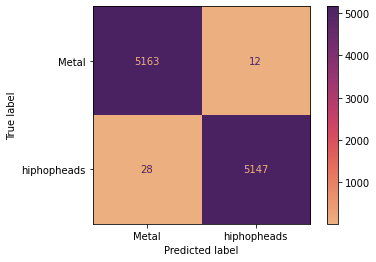

In [77]:
ConfusionMatrixDisplay.from_estimator(pipe_logreg_1, X_test, y_test, cmap='flare');

Pipeline with 'selftext' as the only feature:

- The following model misclassifies the metal posts as all being hip hop post due to imbalance, in spite of a random state and class weight being added to its logistic regression to balance the classes.

In [78]:
pipe_logreg_2 = Pipeline([
    ('cvt', CountVectorizer()),
    ('lr1', LogisticRegression(max_iter=10_000,random_state=48,class_weight='balanced'))
])
pipe_logreg_2.fit(X_train_s, y_train_s)
pipe_logreg_2.score(X_train_s, y_train_s), pipe_logreg_2.score(X_test_s, y_test_s)

(1.0, 0.9985294117647059)

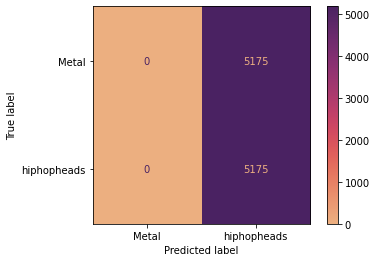

In [79]:
ConfusionMatrixDisplay.from_estimator(pipe_logreg_2, X_test, y_test, cmap='flare');

Pipeline including both 'title' and 'selftext' as features:

- The best starter model using both 'title' and 'selftext'

In [80]:
pipe_logreg_3 = Pipeline([
    ('lr1', LogisticRegression(max_iter=10_000))])

pipe_logreg_3.fit(X_train_t, y_train_t)
pipe_logreg_3.score(X_train_t, y_train_t), pipe_logreg_3.score(X_test_t, y_test_t)

(1.0, 0.9985294117647059)

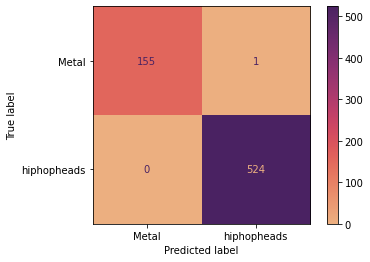

In [82]:
ConfusionMatrixDisplay.from_estimator(pipe_logreg_3, X_test_t, y_test_t, cmap='flare');

##### Logistic Regression Model - 'selftext' Model 1

In [86]:
pipe_selftalk_1 = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=10_000,random_state=48,class_weight='balanced'))

params_st = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
}

gs1 = GridSearchCV(pipe_selftalk_1, params_st)
gs1.fit(X_train_s, y_train_s)
gs1.score(X_test_s, y_test_s)


0.9985294117647059

In [87]:
balanced_accuracy_score(y_test_s, gs1.predict(X_test_s))

0.9967948717948718

In [88]:
f1_score(y_test_s, gs1.predict(X_test_s), pos_label='hiphopheads')

0.9990467111534795

In [89]:
gs1.best_params_, gs1.best_estimator_ 

({'countvectorizer__ngram_range': (1, 1),
  'countvectorizer__stop_words': 'english'},
 Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                 ('logisticregression',
                  LogisticRegression(class_weight='balanced', max_iter=10000,
                                     random_state=48))]))

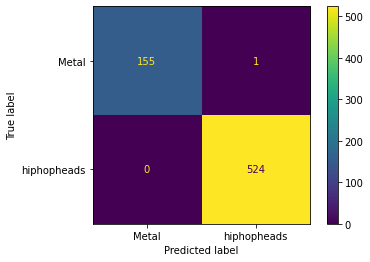

In [90]:
ConfusionMatrixDisplay.from_estimator(gs1, X_test_s, y_test_s);

##### Logistic Regression Model - 'selftext' Model 2

In [91]:
pipe_selftalk_2 = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=10_000))

params_st = {
    'countvectorizer__stop_words': ['english'],
    'countvectorizer__ngram_range': [(1,1)],
    'countvectorizer__min_df': [3,4,5],
    'countvectorizer__max_df': [.3, .4],
    'logisticregression__C': [.1, 1, 10],
} 

gs2 = GridSearchCV(pipe_selftalk_2, params_st)
gs2.fit(X_train_s, y_train_s)
gs2.score(X_test_s, y_test_s)

0.9985294117647059

In [92]:
balanced_accuracy_score(y_test_s, gs2.predict(X_test_s))

0.9967948717948718

In [93]:
f1_score(y_test_s, gs2.predict(X_test_s), pos_label='hiphopheads')

0.9990467111534795

In [94]:
gs2.best_params_, gs2.best_estimator_ 

({'countvectorizer__max_df': 0.3,
  'countvectorizer__min_df': 3,
  'countvectorizer__ngram_range': (1, 1),
  'countvectorizer__stop_words': 'english',
  'logisticregression__C': 0.1},
 Pipeline(steps=[('countvectorizer',
                  CountVectorizer(max_df=0.3, min_df=3, stop_words='english')),
                 ('logisticregression',
                  LogisticRegression(C=0.1, max_iter=10000))]))

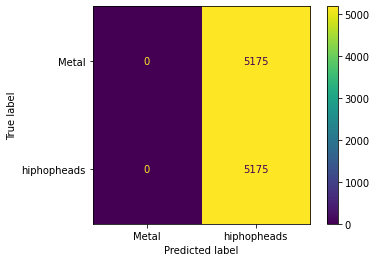

In [95]:
ConfusionMatrixDisplay.from_estimator(gs2, X_test, y_test);

##### Logistic Regression Model - 'selftalk' Model 3

In [96]:
pipe_selftalk_3 = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=10_000))

params_st = {
    'countvectorizer__stop_words': ['english'],
    'countvectorizer__ngram_range': [(1,1), (1,2)],
    'countvectorizer__min_df': [1,2,3],
    'countvectorizer__max_df': [.1,.2,.3],
    'logisticregression__C': [.001,.01,.1],
} 

gs3 = GridSearchCV(pipe_selftalk_3, params_st)
gs3.fit(X_train_s, y_train_s)
gs3.score(X_test_s, y_test_s)

0.9985294117647059

In [97]:
balanced_accuracy_score(y_test_s, gs3.predict(X_test_s))

0.9967948717948718

In [98]:
f1_score(y_test_s, gs3.predict(X_test_s), pos_label='hiphopheads')

0.9990467111534795

In [99]:
gs3.best_params_, gs3.best_estimator_ 

({'countvectorizer__max_df': 0.2,
  'countvectorizer__min_df': 1,
  'countvectorizer__ngram_range': (1, 1),
  'countvectorizer__stop_words': 'english',
  'logisticregression__C': 0.1},
 Pipeline(steps=[('countvectorizer',
                  CountVectorizer(max_df=0.2, stop_words='english')),
                 ('logisticregression',
                  LogisticRegression(C=0.1, max_iter=10000))]))

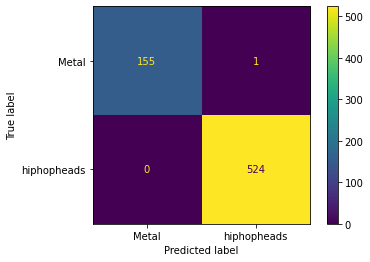

In [100]:
ConfusionMatrixDisplay.from_estimator(gs3, X_test_s, y_test_s);

#### Naive Bayes Model

##### Naive Bayes Model 'selftalk'

In [101]:
#https://scikit-learn.org/stable/modules/naive_bayes.html
cvtn = CountVectorizer()
X_train_cvtn = cvtn.fit_transform(X_train_s)
X_test_cvtn = cvtn.transform(X_test_s)

nb1 = BernoulliNB()
nb1.fit(X_train_cvtn, y_train_s)
nb1.score(X_test_cvtn, y_test_s)

1.0

##### Naive Bayes Model 'title'

In [107]:
cvtm = CountVectorizer()
X_train_cvtm = cvtn.fit_transform(X_train)
X_test_cvtm = cvtn.transform(X_test)

nb2 = BernoulliNB()
nb2.fit(X_train_cvtm, y_train)
nb2.score(X_test_cvtm, y_test)

0.9874396135265701

##### Naive Bayes Model 'title' and 'selftalk'

In [112]:
nb3 = BernoulliNB()
nb3.fit(X_train_t, y_train_t)
nb3.score(X_train_t, y_train_t), nb3.score(X_test_t, y_test_t)

(0.9985272459499264, 1.0)

### Classification Models

#### Null Model

In [116]:
#The baseline accuracy rate is 77%
y.value_counts(normalize=True)

hiphopheads    0.5
Metal          0.5
Name: subreddit, dtype: float64

##### Simple Model:

Using only the title column for X.

#### Logistic Regression:
##### Best Model: Logistic Regression Model - 'selftalk' Model 1
Both the 'selftalk' model 1 and 'selftalk' model 2 had the same scores, but 'selftalk' model 1 was able to acheive those scores with less features.

In [117]:
pipe_selftalk_1 = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=10_000,random_state=48,class_weight='balanced'))

params_st = {
    'countvectorizer__stop_words': [None, 'english'],
    'countvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
}

gs1 = GridSearchCV(pipe_selftalk_1, params_st)
gs1.fit(X_train_s, y_train_s)
gs1.score(X_test_s, y_test_s)

0.9985294117647059

#### Naive Bayes Classifier:
##### Best Model:
The Naive Bayes model using both 'title' and 'selftext', and the model using only 'self text' scored the same. For the purpose of comparison, I'll use the model that features only 'self talk' so the comparison between the logistic regression model and this model will be even.

In [138]:
cvtn = CountVectorizer()
X_train_cvtn = cvtn.fit_transform(X_train_s)
X_test_cvtn = cvtn.transform(X_test_s)

nb1 = BernoulliNB()
nb1.fit(X_train_cvtn, y_train_s)
nb1.score(X_test_cvtn, y_test_s)

1.0

## Model Evaluation

### The Naive Bayes Classifier produced a better accuracy score.

|Naive Bayes(BernoulliNB)|Model Performance|
|------|------|
|Accuracy Score: 1.0| This model predicted which category each post belonged to with 100% accuracy.|
|Precision Score: 1.0|Of the posts that the model predicted were accurately classed, 100% were true positives.|
|F1 Score: 1.0|Post that were actual positive were correctly predicted and post the were predicted were actual positive|

In [119]:
nb1.score(X_test_cvtn, y_test_s)

1.0

In [140]:
precision_score(y_test_s, nb1.predict(X_test_cvtn), pos_label='hiphopheads')

1.0

In [142]:
f1_score(y_test_s, nb1.predict(X_test_cvtn), pos_label='hiphopheads')

1.0

In [121]:
balanced_accuracy_score(y_test_s, nb1.predict(X_test_cvtn))

1.0

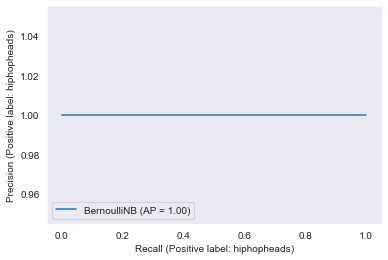

In [134]:
PrecisionRecallDisplay.from_estimator(nb1, X_test_cvtn, y_test_s);

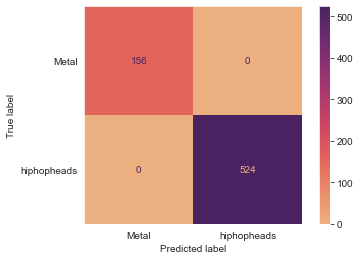

In [131]:
ConfusionMatrixDisplay.from_estimator(nb1, X_test_cvtn, y_test_s, cmap='flare');

#### ROC curves

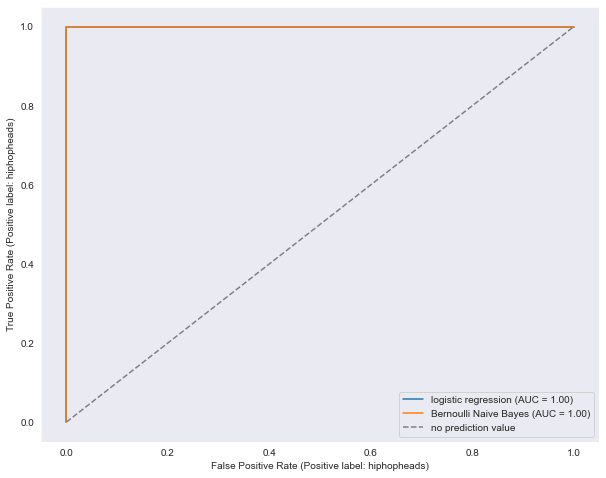

In [136]:
plt.figure(figsize=(10,8))
ax = plt.gca()
logreg_model = RocCurveDisplay.from_estimator(gs1, X_test_s, y_test_s, ax=ax, name='logistic regression')
nb_model = RocCurveDisplay.from_estimator(nb1, X_test_cvtn, y_test_s, ax=ax, name='Bernoulli Naive Bayes')

plt.plot([0,1], [0,1], label='no prediction value', linestyle='--', color='gray')
plt.legend();

#### Predicted Probability 

In [127]:
y_preds_nb = nb1.predict(X_train_cvtn)

y_preds_nb_prob = nb1.predict_proba(X_train_cvtn)

y_preds_logreg = gs1.predict(X_train_s)

y_preds_logreg = gs1.predict_proba(X_train_s)

predicted_prob_logreg = pd.DataFrame(
    gs1.predict_proba(X_test_s),
    columns=['p(hiphopheads)', 'p(metal)'])
predicted_prob_nb = pd.DataFrame(
    nb1.predict_proba(X_train_cvtn),
    columns=['p(hiphopheads)', 'p(metal)'])

In [128]:
y_preds_nb_prob.shape, X_train.shape

((2037, 2), (31050,))

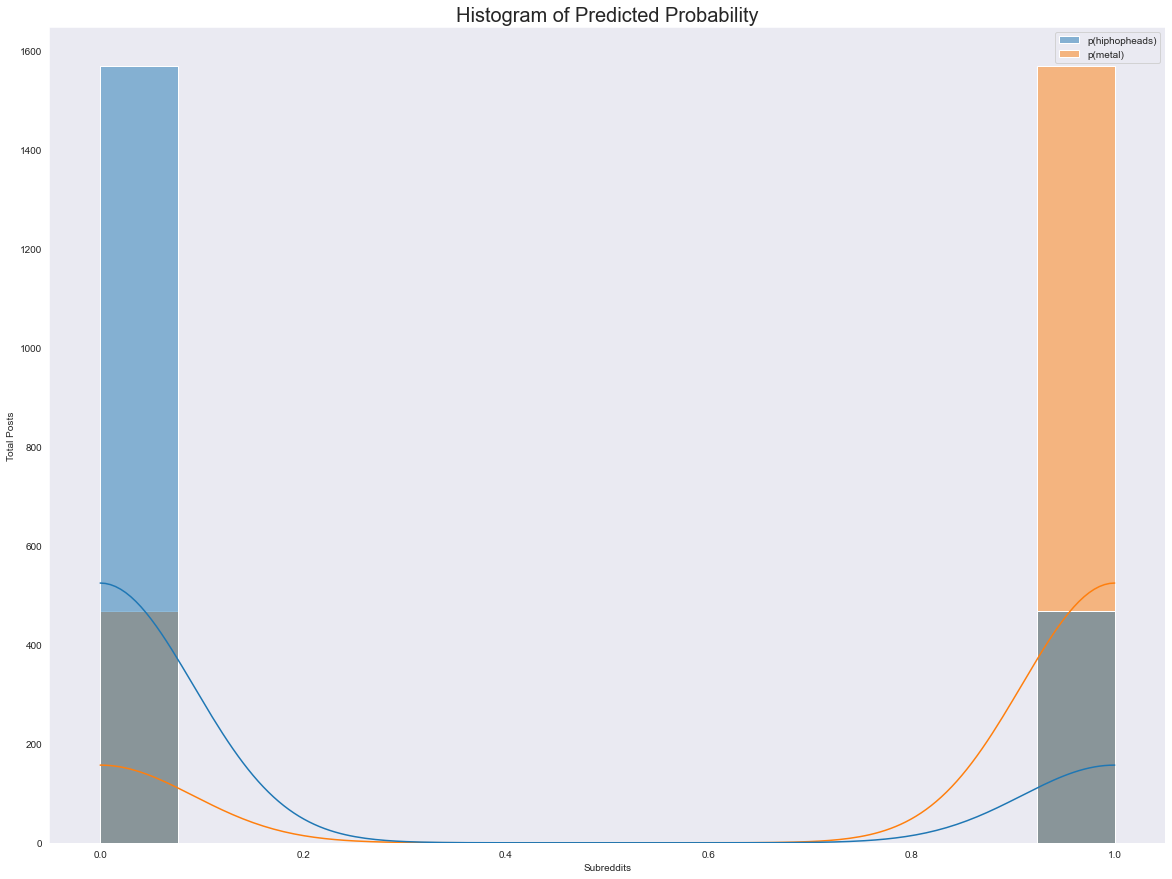

In [137]:
plt.figure(figsize=(20,15))
sns.histplot(data=predicted_prob_nb, color='olive', kde=True)
sns.set_style('dark')
plt.title('Histogram of Predicted Probability',fontdict={'fontsize': 20})
plt.xlabel('Subreddits')
plt.ylabel('Total Posts');

## Conclusion and Recommendations

The Naive Bayes (BernoulliNB) produced the highest accuracy score, precision score, and F1 score.

Naive Bayes was more effective at classifying the subreddit posts into their correct categories than the logistic regression models. It was able to accurately categorize subreddit posts with perfect accuracy on the test set, and satisfy the requirements for the company, Baseline, which allow them to focus on using the insight from the binary classification to gain insight that will propel their marketing strategy. The precision score is especially important to measure whether a post is a false positive, which could do more harm to Baseline's marketing campaigns, negatively affecting their business.

The model does exceptionally well on this particular dataset, but it is uncertain how well it would generalize on another dataset gathered from similar subreddits from the same genres.